In [31]:
import os

In [32]:
#to check if the dataset are present in the working directory
os.listdir()

['.ipynb_checkpoints',
 'Banking .ipynb',
 'problem Statement.docx',
 'test.csv',
 'train.csv']

In [33]:
#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings                      # ignoring all the warnings
warnings.filterwarnings("ignore")

In [34]:
# reading of test and train dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [35]:
df_train = pd.DataFrame(train)
df_test = pd.DataFrame(test)

In [36]:
#top 5 rows of the dataset
df_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [37]:
# checking the info about the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
ID            31647 non-null int64
age           31647 non-null int64
job           31647 non-null object
marital       31647 non-null object
education     31647 non-null object
default       31647 non-null object
balance       31647 non-null int64
housing       31647 non-null object
loan          31647 non-null object
contact       31647 non-null object
day           31647 non-null int64
month         31647 non-null object
duration      31647 non-null int64
campaign      31647 non-null int64
pdays         31647 non-null int64
previous      31647 non-null int64
poutcome      31647 non-null object
subscribed    31647 non-null object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


# Analyse the data

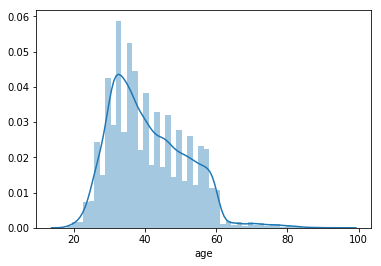

In [38]:
# how age is related to the subscription
sbn.distplot(df_train.age)

we can infer that most of client fall in the age group between 20-60

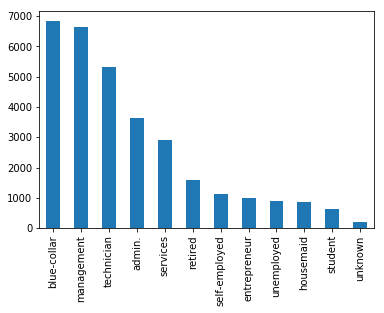

In [39]:
df_train.job.value_counts().plot.bar()

we can see that the most of the client belong to the blue collared job and students are least in number

In [40]:
pd.crosstab(df_train.job,df_train.subscribed)

subscribed,no,yes
job,,
admin.,3179,452
blue-collar,6353,489
entrepreneur,923,85
housemaid,795,79
management,5716,923
retired,1212,362
self-employed,983,140
services,2649,254
student,453,182


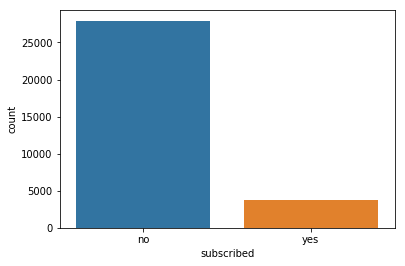

In [41]:
sbn.countplot(df_train.subscribed)

So, 3715 users out of total 31647 have subscribed which is around 12%.

# Multivariate Analysis

In [42]:
#first we have to convert the subscribed column into binary number
df_train.subscribed.replace('yes',1,inplace=True)
df_train.subscribed.replace('no',0,inplace=True)

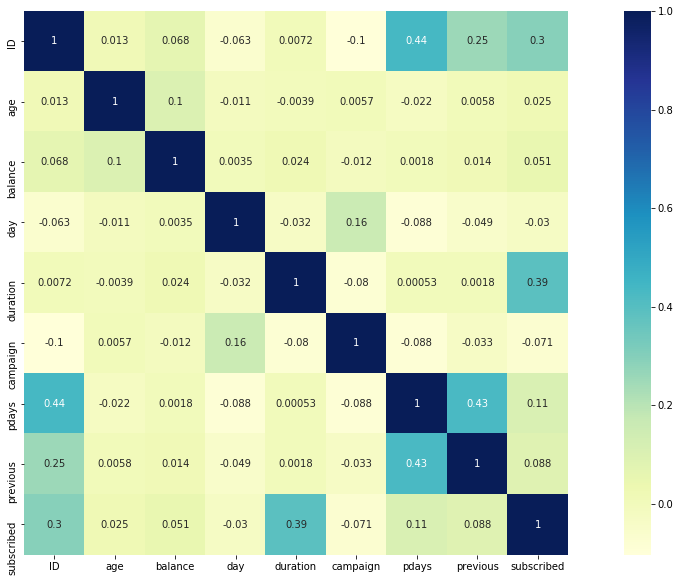

In [43]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sbn.heatmap(df_train.corr(),square=True,annot=True,cmap="YlGnBu")

# Data Wrangling

In [44]:
# checking if any null values are there
df_train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [45]:
df_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0


In [46]:
#removing the unncessary column from the dataset
df_train.drop(['ID','day'],axis=1,inplace=True)

In [47]:
df_train=pd.get_dummies(df_train)

# Training model

In [48]:
x = df_train.drop(['subscribed'],axis=1)
y = df_train.subscribed

In [49]:
#splitting the model into test and train datset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=101)

In [50]:
# calling instance of the model
model = LogisticRegression()

In [51]:
# fitting the model
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
#predicting the new value of y
y_pred = model.predict(x_test)

In [53]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      7428
           1       0.35      0.67      0.46       484

   micro avg       0.90      0.90      0.90      7912
   macro avg       0.66      0.79      0.70      7912
weighted avg       0.94      0.90      0.92      7912



In [54]:
from sklearn.metrics import accuracy_score

In [55]:
#checking the score
accuracy_score(y_pred,y_test)

0.9045753286147624